In [1]:
# BM20A6100 Project work Forecasting power for predicting temperature using multivariate data
# Emma Hirvonen, Helmi Toropainen, Jan Vymazal

# Import dataset with Pandas
import pandas as pd
file_path = "sample_data/DailyDelhiClimateTrain.csv"
climate_data = pd.read_csv(file_path, parse_dates=["date"])
climate_data = climate_data.set_index("date") # use date as index
print(climate_data.info())
print(climate_data.head())
print(climate_data.describe())
# Data consists of 4 variables for 1462 samples, no missing values

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
dtypes: float64(4)
memory usage: 57.1 KB
None
             meantemp   humidity  wind_speed  meanpressure
date                                                      
2013-01-01  10.000000  84.500000    0.000000   1015.666667
2013-01-02   7.400000  92.000000    2.980000   1017.800000
2013-01-03   7.166667  87.000000    4.633333   1018.666667
2013-01-04   8.666667  71.333333    1.233333   1017.166667
2013-01-05   6.000000  86.833333    3.700000   1016.500000
          meantemp     humidity   wind_speed  meanpressure
count  1462.000000  1462.000000  1462.000000   1462.000000
mean     25.495521    60.771702     6.802

<Figure size 640x480 with 0 Axes>

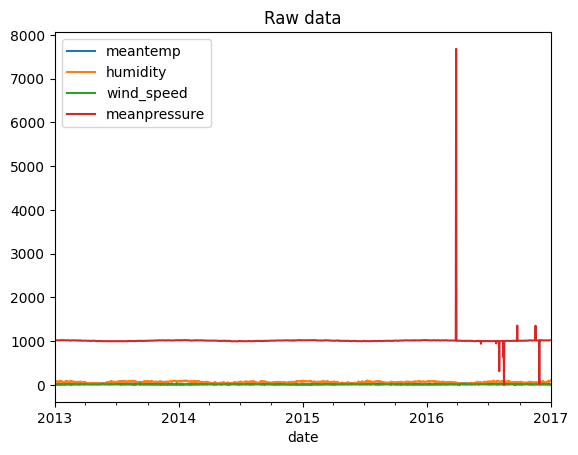

<Figure size 640x480 with 0 Axes>

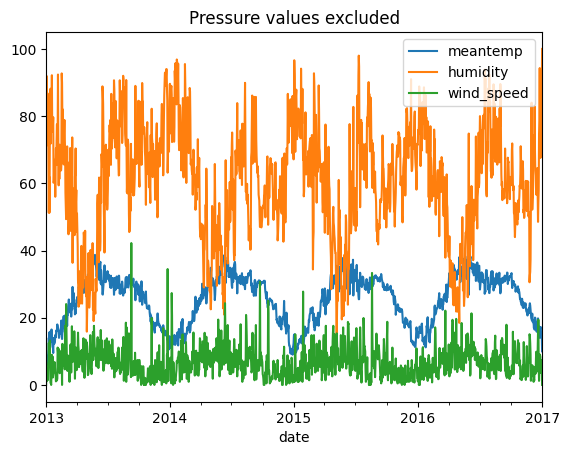

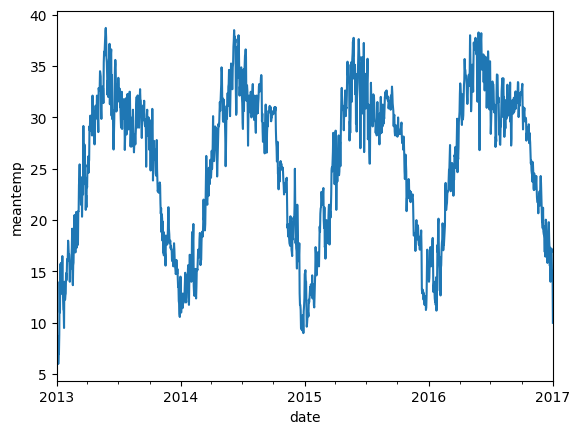

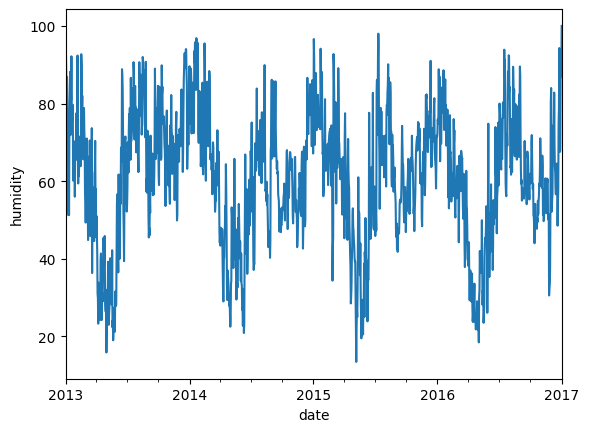

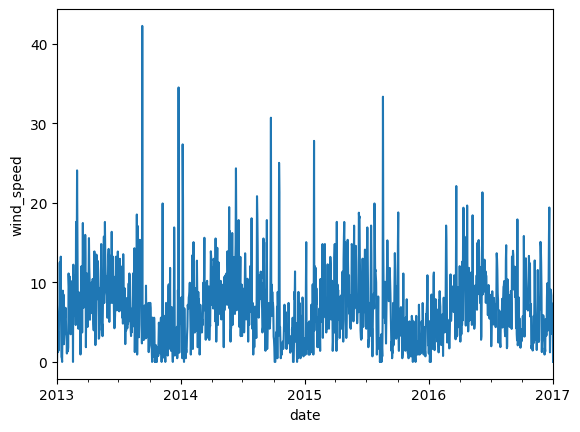

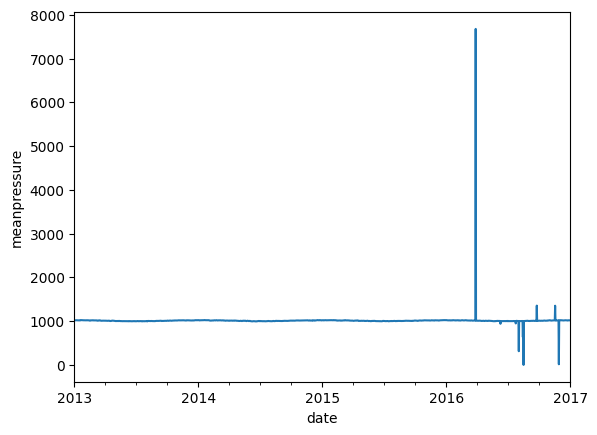

In [2]:
# Visualise timerseries for all variables
import matplotlib.pyplot as plt

plt.figure()
climate_data.plot()
plt.title("Raw data")
plt.show()

plt.figure()
climate_data.drop("meanpressure", axis=1).plot()
plt.title("Pressure values excluded")
plt.show()

for var in climate_data.columns:
  plt.figure()
  climate_data[var].plot()
  plt.ylabel(var)
  plt.show()

In [3]:
# remove outlier
print(climate_data[climate_data["meanpressure"] > 2000]) # outlier?
climate_data_clean = climate_data.copy()

t = pd.Timestamp(climate_data_clean[climate_data_clean["meanpressure"] > 2000].index.date[0]) # outlier date
i = climate_data_clean.index.get_loc(t) # outlier index

new_pressure = (climate_data_clean.iloc[i+1].get("meanpressure")+climate_data_clean.iloc[i-1].get("meanpressure"))/2 # average of prev and next value

climate_data_clean.loc[t, "meanpressure"] = new_pressure

             meantemp  humidity  wind_speed  meanpressure
date                                                     
2016-03-28  25.933333      52.8    6.546667   7679.333333


In [4]:
import datetime

<Figure size 640x480 with 0 Axes>

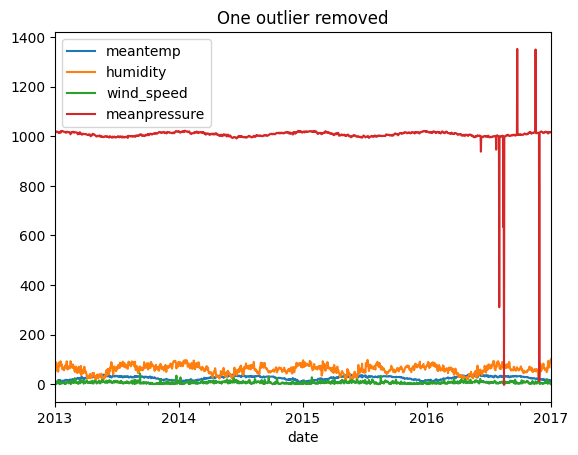

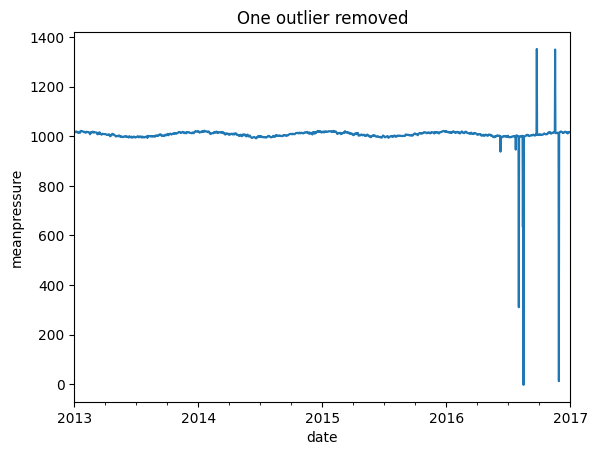

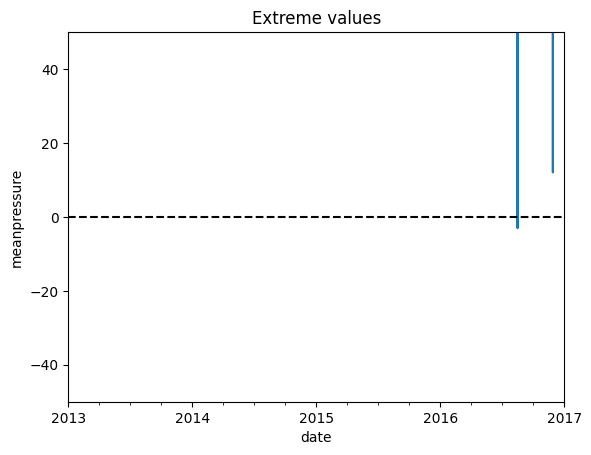

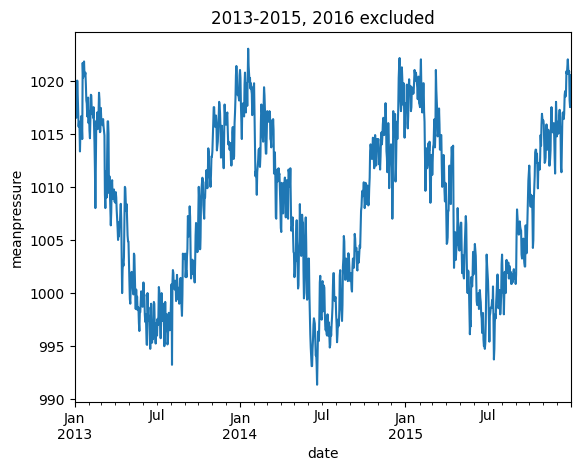

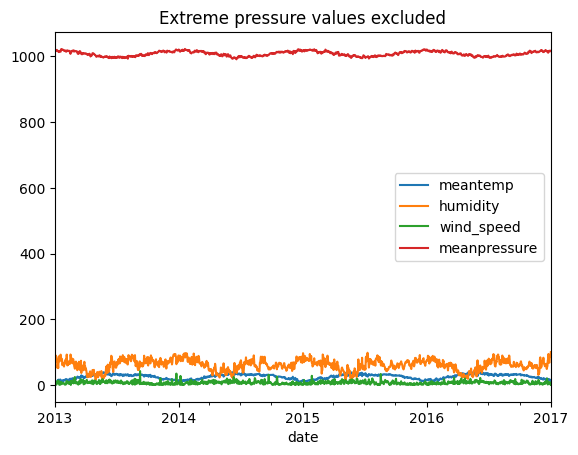

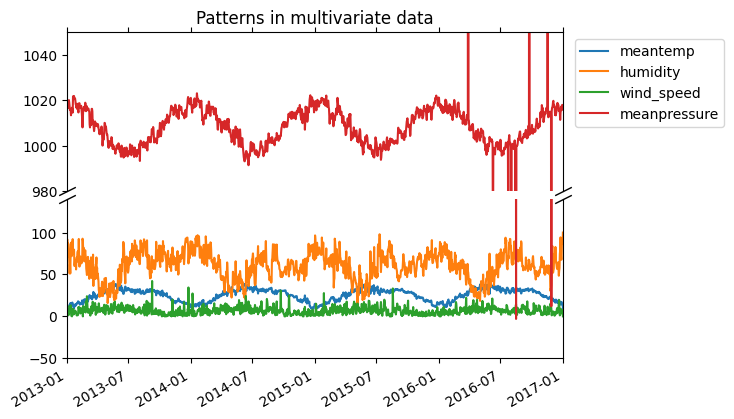

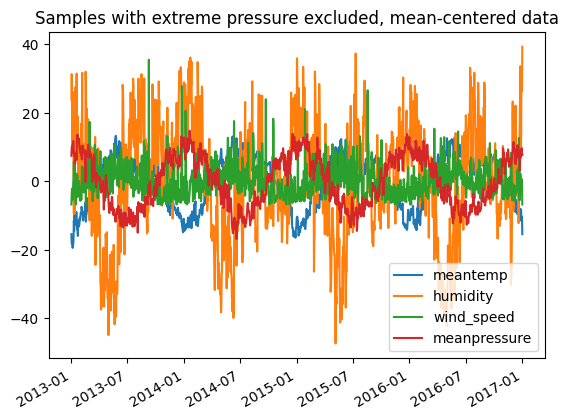

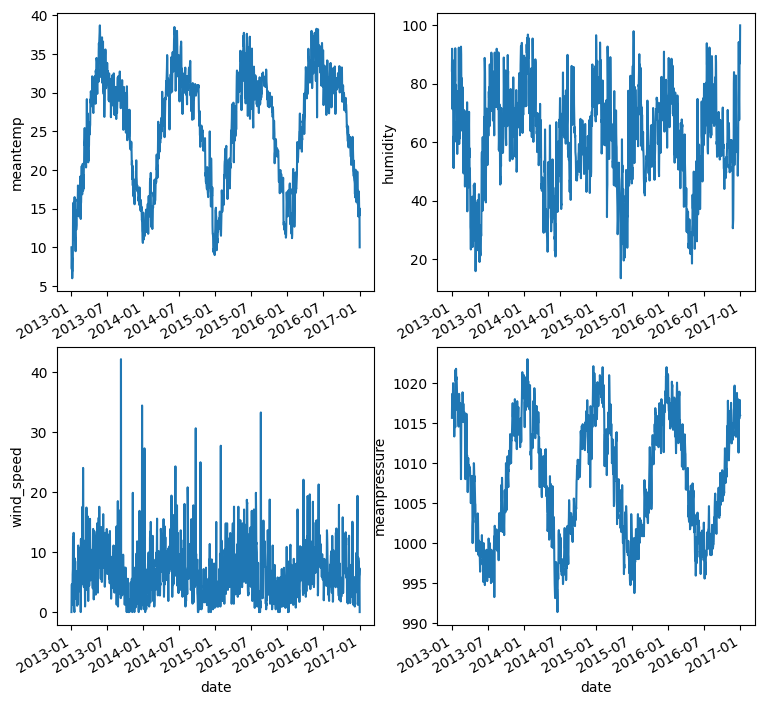

In [5]:
# new plots without outlier
plt.figure()
climate_data_clean.plot()
plt.title("One outlier removed")
plt.show()

plt.figure()
climate_data_clean["meanpressure"].plot()
plt.ylabel("meanpressure")
plt.title("One outlier removed")
plt.show()

# negative pressure?
plt.figure()
climate_data["meanpressure"].plot()
plt.ylabel("meanpressure")
plt.axhline(y=0, color='k', linestyle='--')
plt.ylim(-50, 50)
plt.title("Extreme values")
plt.show()

# pressure values from 2013-01-01 to 2016-01-01 (2016 seems unreliable?)
plt.figure()
climate_data.iloc[0:365+365+365, 3].plot()
plt.ylabel("meanpressure")
plt.title("2013-2015, 2016 excluded")
plt.show()
# all values should be between ~990-1030?

# skip outlier values
climate_data.drop("meanpressure", axis=1).plot()
climate_data.query("990 < meanpressure < 1030")["meanpressure"].plot()
plt.legend()
plt.title("Extreme pressure values excluded")
plt.show()

# broken y-axis (matplotlib documentation)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.subplots_adjust(hspace=0.05)
plt_data = climate_data#.query("990 < meanpressure < 1030")
ax1.plot(plt_data)
ax1.set_ylim((980, 1050))
ax1.set_xlim([datetime.date(2013, 1, 1), datetime.date(2017, 1, 1)])
ax2.plot(plt_data)
ax2.set_ylim((-50, 140))
ax2.set_xlim([datetime.date(2013, 1, 1), datetime.date(2017, 1, 1)])
ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)
ax2.xaxis.tick_bottom()
ax1.legend(plt_data.columns, bbox_to_anchor=(1.01, 1.0), loc='upper left')
ax1.title.set_text("Patterns in multivariate data")
fig.autofmt_xdate()
d = .5
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)
plt.show()

# mean center data
plt.figure()
plt.plot(climate_data.query("990 < meanpressure < 1030") - climate_data.query("990 < meanpressure < 1030").mean())
plt.gcf().autofmt_xdate()
plt.legend(climate_data.columns)
plt.title("Samples with extreme pressure excluded, mean-centered data")
plt.show()

# subplot of all variables (no mean-centering)
plt.figure(figsize=(9, 9))
for i in range(4):
  plt.subplot(2,2,i+1)
  climate_data.query("990 < meanpressure < 1030").iloc[:, i].plot()
  plt.ylabel(climate_data.columns[i])
plt.show()


In [6]:
# Remove outliers from meanpressure

dates = climate_data_clean.query("meanpressure < 990 or meanpressure > 1030").index.date

for date in dates:
  t = pd.Timestamp(date)
  i = climate_data_clean.index.get_loc(t)
  new_pressure = (climate_data_clean.iloc[i+1].get("meanpressure")+climate_data_clean.iloc[i-1].get("meanpressure"))/2 # average of prev and next value
  climate_data_clean.loc[t, "meanpressure"] = new_pressure

climate_data = climate_data_clean.copy()



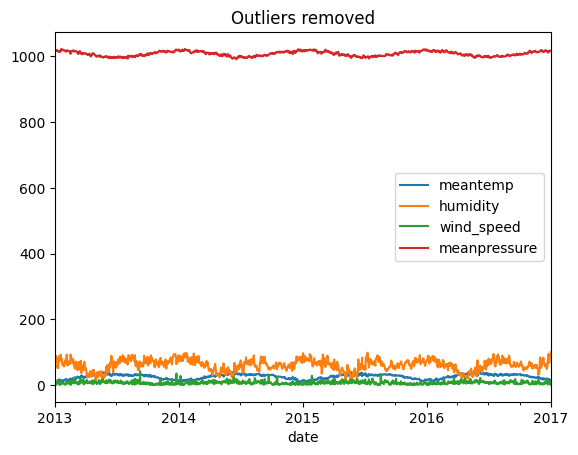

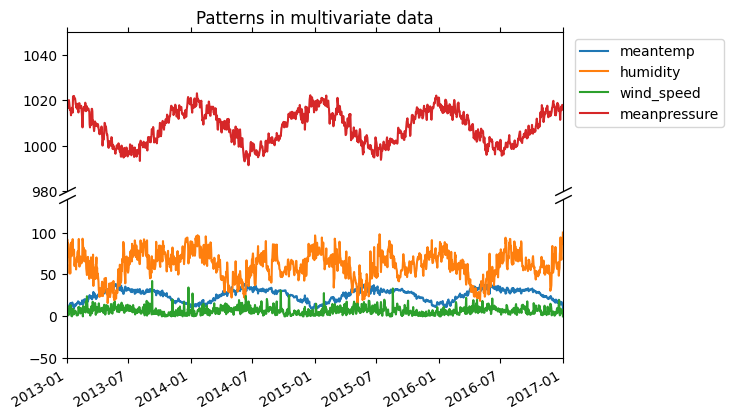

In [7]:
# Outliers removed
climate_data_clean.plot()
plt.title("Outliers removed")
plt.show()

# broken y-axis (matplotlib documentation)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.subplots_adjust(hspace=0.05)
plt_data = climate_data_clean
ax1.plot(plt_data)
ax1.set_ylim((980, 1050))
ax1.set_xlim([datetime.date(2013, 1, 1), datetime.date(2017, 1, 1)])
ax2.plot(plt_data)
ax2.set_ylim((-50, 140))
ax2.set_xlim([datetime.date(2013, 1, 1), datetime.date(2017, 1, 1)])
ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)
ax2.xaxis.tick_bottom()
ax1.legend(plt_data.columns, bbox_to_anchor=(1.01, 1.0), loc='upper left')
ax1.title.set_text("Patterns in multivariate data")
fig.autofmt_xdate()
d = .5
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)
plt.show()

Time-series decomposition TODO: use this somewhere? e.g. remove trend

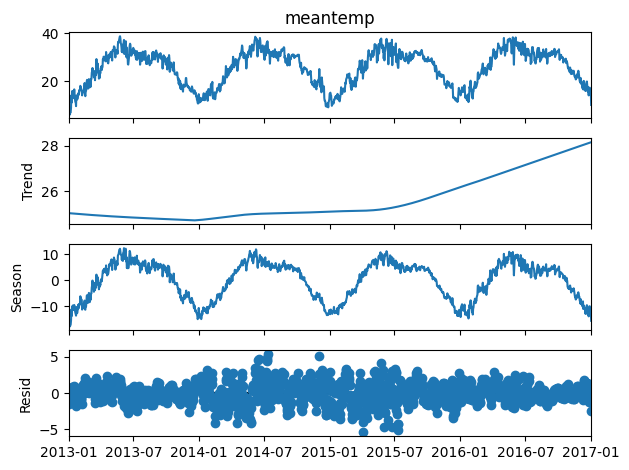

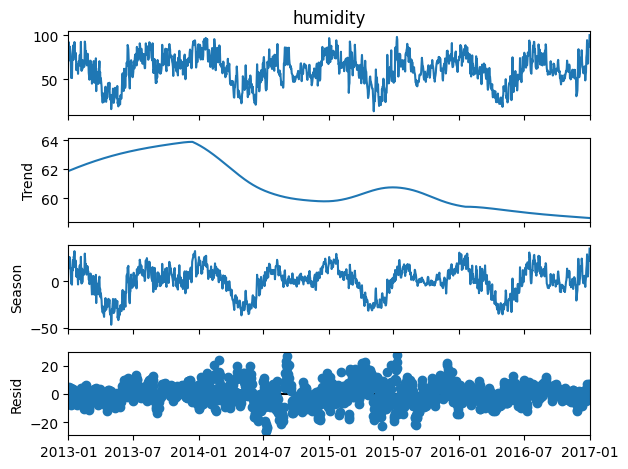

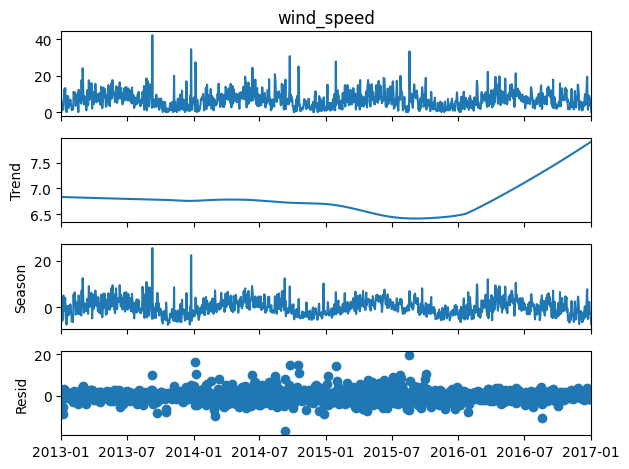

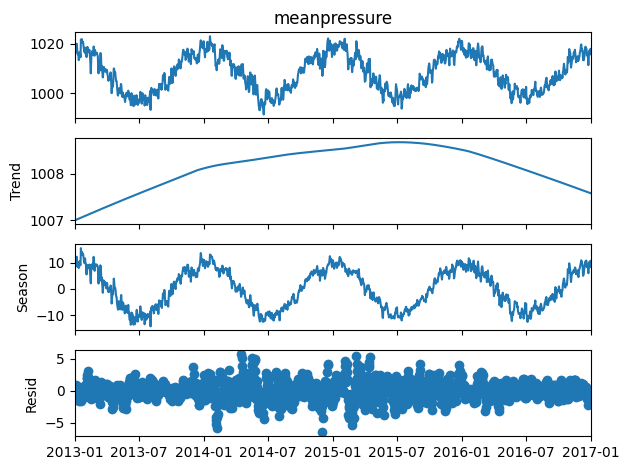

In [8]:
#Time-series decomposition analysis in long-term trend, seasonality and residuals
#Period 365 because we measure once per day for multiple years
from statsmodels.tsa.seasonal import STL
stl = STL(climate_data["meantemp"], period=365 )
res = stl.fit()
fig = res.plot()

stl = STL(climate_data["humidity"], period=365)
res = stl.fit()
fig = res.plot()

stl = STL(climate_data["wind_speed"], period=365)
res = stl.fit()
fig = res.plot()

stl = STL(climate_data["meanpressure"], period=365)
res = stl.fit()
fig = res.plot()


Text(0.5, 1.0, 'Mean pressure autocorrelation')

<Figure size 640x480 with 0 Axes>

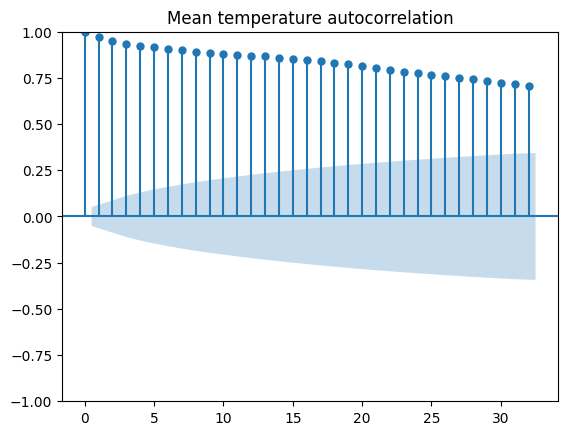

<Figure size 640x480 with 0 Axes>

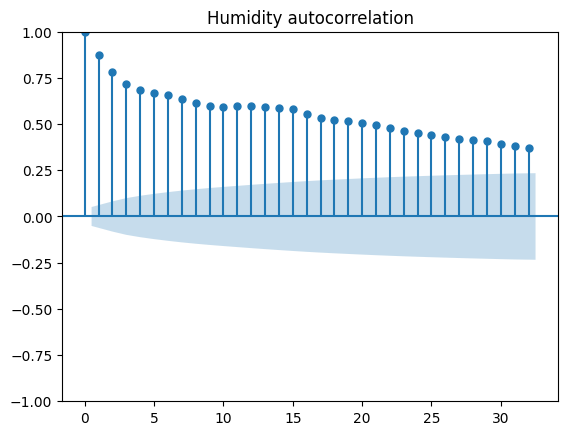

<Figure size 640x480 with 0 Axes>

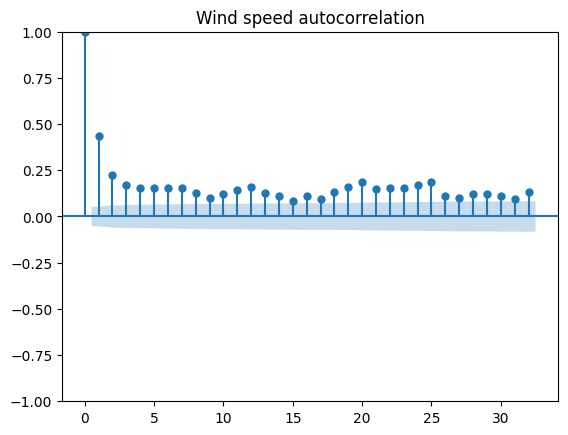

<Figure size 640x480 with 0 Axes>

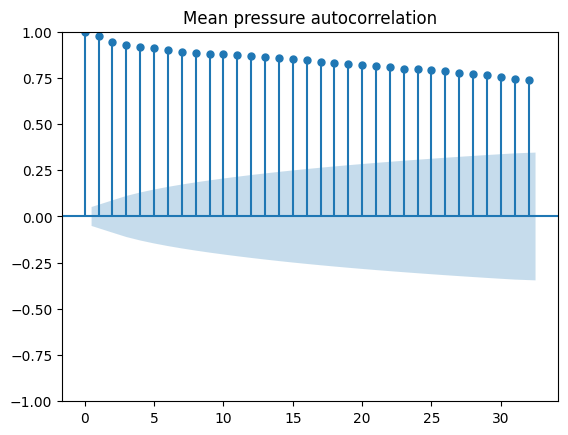

In [9]:
#Autocorrelation analysis of the dataset
from statsmodels.graphics.tsaplots import plot_acf
plt.figure()
plot_acf(climate_data["meantemp"])
plt.title("Mean temperature autocorrelation")

plt.figure()
plot_acf(climate_data["humidity"])
plt.title("Humidity autocorrelation")

plt.figure()
plot_acf(climate_data["wind_speed"])
plt.title("Wind speed autocorrelation")

plt.figure()
plot_acf(climate_data["meanpressure"])
plt.title("Mean pressure autocorrelation")


Baseline model

In [10]:
# Basline autoregressive model

import tensorflow as tf
import numpy as np

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers.legacy import SGD, Adam
from tensorflow.keras.optimizers import Adam

In [11]:
# Build the dataset
T =100
X = []
Y = []
series = climate_data['meantemp']
series = (series-series.mean())/series.std() # normalise
series = series.to_numpy()
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (1362, 100) Y.shape (1362,)


In [12]:
# Try autoregressive model
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i, x)
model.compile(
    loss='mse',
    optimizer=Adam(learning_rate=0.001)
)

# train
r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs=80,
    validation_data=(X[-N//2:], Y[-N//2:]),
)

Epoch 1/80
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.9469 - val_loss: 0.5855
Epoch 2/80
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4105 - val_loss: 0.3941
Epoch 3/80
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3434 - val_loss: 0.3543
Epoch 4/80
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3009 - val_loss: 0.3447
Epoch 5/80
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2863 - val_loss: 0.3326
Epoch 6/80
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3153 - val_loss: 0.3225
Epoch 7/80
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2780 - val_loss: 0.3111
Epoch 8/80
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2882 - val_loss: 0.3011
Epoch 9/80
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2580 - val_loss: 0.2898
Epoch 10/80
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2542 - val_loss: 0.2818
Epoch 11/80
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2532 - val_loss: 0.2706
Epoch 12/80
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2640 - val_l

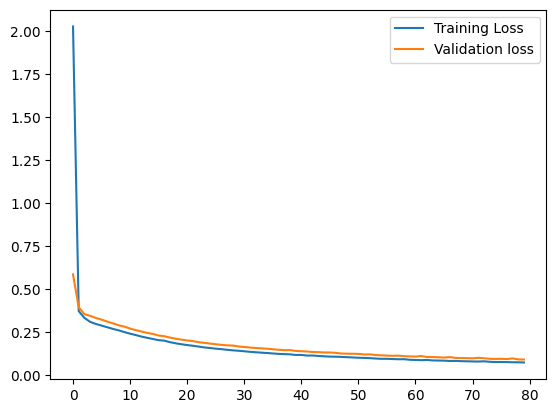

In [13]:
# Plot loss per iteration
plt.plot(r.history["loss"], label="Training Loss")
plt.plot(r.history["val_loss"], label="Validation loss")
plt.legend()
plt.show()

In [14]:
# Forecast future values
validation_target = Y[-N//2:]
validation_predictions = []

# Last train input
last_x = X[-N//2]

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1))[0, 0] # 1x1 array

  # Update predictions list
  validation_predictions.append(p)

  # Make the new input
  last_x = np.roll(last_x, -1) # shift everything one spot to the left, we replace it with the latest forecasted prediction. Multi-step predictions.
  last_x[-1] = p

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━

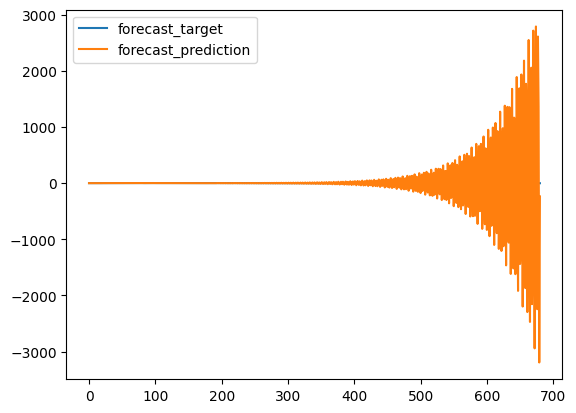

In [15]:
plt.plot(validation_target, label="forecast_target")
plt.plot(validation_predictions, label="forecast_prediction")
plt.legend()
plt.show()

In [16]:
from keras.models import Sequential
from keras.layers import SimpleRNN, LSTM
from tensorflow.keras.optimizers import RMSprop
from keras.utils import plot_model

RNN (plan)

In [17]:
num_units = 128
num_features = 4
num_dense = 64
lr = 0.001

modelRNN = Sequential()
modelRNN.add(SimpleRNN(units=num_units, input_shape=(1,num_features), activation="relu"))
modelRNN.add(Dense(num_dense, activation="relu"))
modelRNN.add(Dense(1))
modelRNN.compile(loss='mean_squared_error', optimizer=RMSprop(learning_rate=lr),metrics=['mse'])
modelRNN.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 128)                 │          17,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,345 (99.00 KB)

 Trainable params: 25,345 (99.00 KB)

 Non-trainable params: 0 (0.00 B)

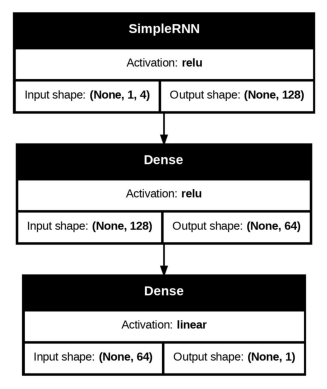

In [18]:
RNN_img_file = '/tmp/model_1.jpg'

plot_model(
    modelRNN,
    to_file=RNN_img_file,
    show_shapes=True,
    show_layer_activations=True,
)

RNN_img = plt.imread(RNN_img_file)
plt.axis('off')
plt.imshow(RNN_img)
plt.show()

LSTM (plan)

In [19]:
modelLSTM = Sequential()
modelLSTM.add(LSTM(num_units, input_shape=(1,num_features), return_sequences=True, activation="relu"))
modelLSTM.add(Dense(num_dense, activation="relu"))
modelLSTM.add(Dense(1))
modelLSTM.compile(loss='mean_squared_error', optimizer=RMSprop(learning_rate=lr),metrics=['mse'])
modelLSTM.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 1, 128)              │          68,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1, 64)               │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1, 1)                │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 76,417 (298.50 KB)

 Trainable params: 76,417 (298.50 KB)

 Non-trainable params: 0 (0.00 B)

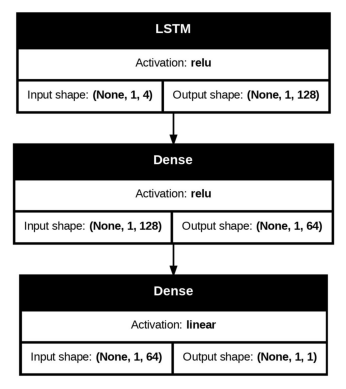

In [20]:
LSTM_img_file = '/tmp/model_2.jpg'

plot_model(
    modelLSTM,
    to_file=LSTM_img_file,
    show_shapes=True,
    show_layer_activations=True,
)

LSTM_img = plt.imread(LSTM_img_file)
plt.axis('off')
plt.imshow(LSTM_img)
plt.show()

Dataset for model training

RNN & LSTM code based on this example : https://www.kaggle.com/code/humagonen/time-series-arima-sarima-prophet-rnn-lstm-gru/notebook


In [21]:
# Creating dataset for model training
df = climate_data_clean
train_split = 0.8
# Split the data into training and testing sets
train_size = int(len(df) * train_split)
dl_train, dl_test = df.iloc[:train_size], df.iloc[train_size:]
print(len(dl_train), len(dl_test))

# Normalizing data with min-max scaling
from sklearn.preprocessing import MinMaxScaler
# Initialize the MinMaxScaler
minmax_scaler = MinMaxScaler()

dl_train[['meantemp', 'humidity', 'wind_speed', 'meanpressure']] = minmax_scaler.fit_transform(dl_train[['meantemp', 'humidity', 'wind_speed', 'meanpressure']])
dl_test[['meantemp', 'humidity', 'wind_speed', 'meanpressure']] = minmax_scaler.transform(dl_test[['meantemp', 'humidity', 'wind_speed', 'meanpressure']])

#target_scaler = MinMaxScaler()

#dl_train[['humidity', 'wind_speed', 'meanpressure']] = minmax_scaler.fit_transform(dl_train[['humidity', 'wind_speed', 'meanpressure']])
#dl_test[['humidity', 'wind_speed', 'meanpressure']] = minmax_scaler.transform(dl_test[['humidity', 'wind_speed', 'meanpressure']])
# OR
#dl_train[['humidity']] = minmax_scaler.fit_transform(dl_train[['humidity']])
#dl_test[['humidity']] = minmax_scaler.transform(dl_test[['humidity']])
#dl_train[['wind_speed']] = minmax_scaler.fit_transform(dl_train[['wind_speed']])
#dl_test[['wind_speed']] = minmax_scaler.transform(dl_test[['wind_speed']])
#dl_train[['meanpressure']] = minmax_scaler.fit_transform(dl_train[['meanpressure']])
#dl_test[['meanpressure']] = minmax_scaler.transform(dl_test[['meanpressure']])

#dl_train[['meantemp']] = target_scaler.fit_transform(dl_train[['meantemp']])
#dl_test[['meanremp']] = target_scaler.transform(dl_test[['meantemp']])

# Creating data set
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)


#sequence_length = 4
#sequence_length = 31
sequence_length = 7
X_train, y_train = create_dataset(dl_train, dl_train['meantemp'], sequence_length)
X_test, y_test = create_dataset(dl_test, dl_test['meantemp'], sequence_length)

1169 293


<ipython-input-21-ad8bc7bdcb2b>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dl_train[['meantemp', 'humidity', 'wind_speed', 'meanpressure']] = minmax_scaler.fit_transform(dl_train[['meantemp', 'humidity', 'wind_speed', 'meanpressure']])
<ipython-input-21-ad8bc7bdcb2b>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dl_test[['meantemp', 'humidity', 'wind_speed', 'meanpressure']] = minmax_scaler.transform(dl_test[['meantemp', 'humidity', 'wind_speed', 'meanpressure']])


In [22]:
print(X_train.shape)
print(y_train.shape)

(1162, 7, 4)
(1162,)


In [23]:
from tensorflow.keras.callbacks import EarlyStopping

RNN

In [24]:
num_hidden_units = 128
epochs = 30
batch_size = 1
patiance = 10

# Build the model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(num_hidden_units, activation='tanh', input_shape=(sequence_length, X_train.shape[2])))
rnn_model.add(Dense(1))
rnn_model.compile(optimizer='adam', loss='mse')

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=patiance, restore_best_weights=True)

# Train the model with early stopping
history = rnn_model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), batch_size=batch_size, callbacks=[early_stopping])

# Evaluate the model
loss = rnn_model.evaluate(X_test, y_test)
print(f'Validation Loss: {loss}')

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1162/1162 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0173 - val_loss: 0.0051
Epoch 2/30
1162/1162 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0041 - val_loss: 0.0029
Epoch 3/30
1162/1162 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0039 - val_loss: 0.0030
Epoch 4/30
1162/1162 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0040 - val_loss: 0.0030
Epoch 5/30
1162/1162 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0034 - val_loss: 0.0026
Epoch 6/30
1162/1162 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0032 - val_loss: 0.0053
Epoch 7/30
1162/1162 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0037 - val_loss: 0.0032
Epoch 8/30
1162/1162 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0033 - val_loss: 0.0037
Epoch 9/30
1162/1162 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0033 - val_loss: 0.0031
Epoch 10/30
1162/1162 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0035 - val_loss: 0.0031
Epoch 11/30
1162/1162 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0032 - val_loss: 0.0026
Epoch 12/30
1162/1162 ━━━━━━━━━━━━━━━━━━━

In [25]:
rnn_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)             │ (None, 128)                 │          17,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,461 (201.02 KB)

 Trainable params: 17,153 (67.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 34,308 (134.02 KB)

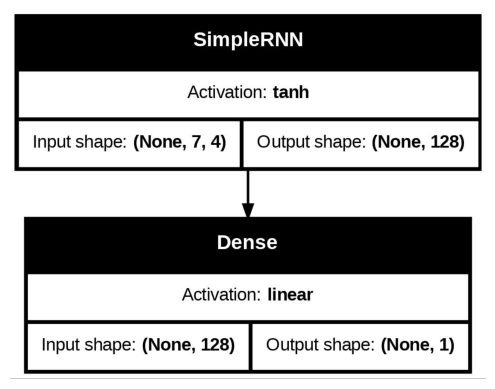

In [26]:
RNN_img_file = '/tmp/model_1.jpg'

plot_model(
    rnn_model,
    to_file=RNN_img_file,
    show_shapes=True,
    show_layer_activations=True,
)

RNN_img = plt.imread(RNN_img_file)
plt.axis('off')
plt.imshow(RNN_img)
plt.show()

In [27]:
# Make predictions
rnn_pred = rnn_model.predict(X_test)
#rnn_pred = target_scaler.inverse_transform(rnn_pred)  # Inverse transform to original scale
#rnn_pred = minmax_scaler.inverse_transform(rnn_pred)  # Inverse transform to original scale
# NOTE: to get the inverse transform to work need seperate target_scaler, had error when I tried it

# Inverse transform the true values for comparison
y_test = y_test.reshape(-1, 1)
#y_test = minmax_scaler.inverse_transform(y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [28]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

RMSE: 0.04941529991161453
R2 Score: 0.9195305378098553


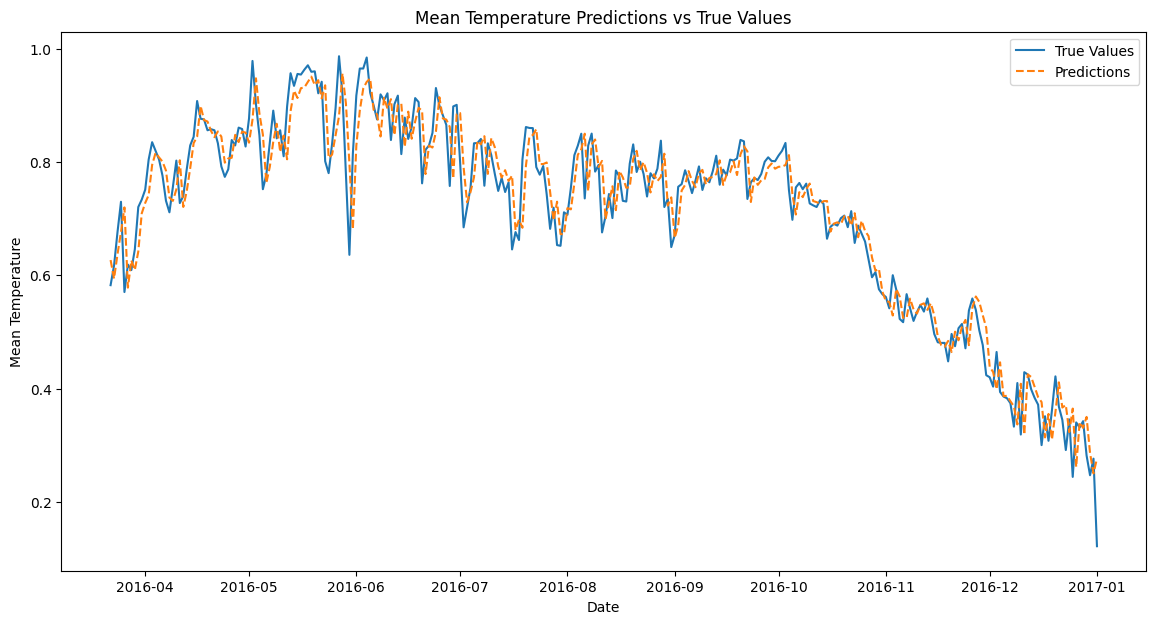

In [29]:
# Calculate RMSE and R2 scores
rmse = np.sqrt(mean_squared_error(y_test, rnn_pred))
r2 = r2_score(y_test, rnn_pred)

print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(df.index[-len(y_test):], y_test, label='True Values')
plt.plot(df.index[-len(y_test):], rnn_pred, label='Predictions', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('Mean Temperature Predictions vs True Values')
plt.legend()
plt.show()

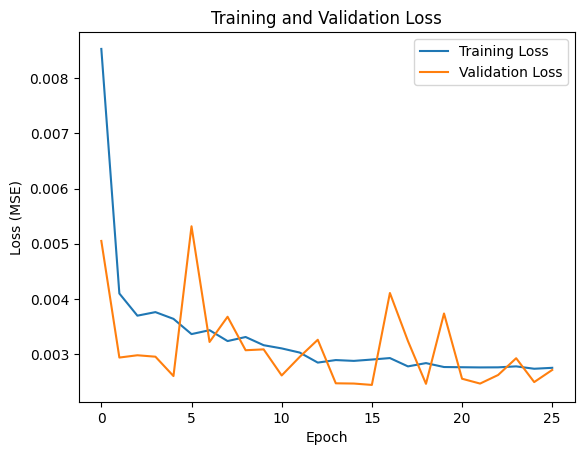

In [30]:
# Get training and validation losses from history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plot loss values over epochs
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [44]:
import itertools
# Hyperparameter analysis
num_units_range = [64, 128, 256]
batch_size_range = [1, 16, 32]
hyperparameter_results = []

# Iterate over different hyperparameters
for num_units, batch_size in itertools.product(num_units_range, batch_size_range):
    print(f"Testing num_units={num_units}, batch_size={batch_size}")

    model = Sequential()
    model.add(SimpleRNN(num_units, activation='tanh', input_shape=(sequence_length, X_train.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    history = model.fit(X_train, y_train, epochs=30, callbacks=[early_stopping], batch_size=batch_size, verbose=0)

    loss = model.evaluate(X_test, y_test, verbose=0)

    lstm_pred = model.predict(X_test,verbose=0)
    rmse = np.sqrt(mean_squared_error(y_test, lstm_pred))

    r2 = r2_score(y_test, lstm_pred)
    hyperparameter_results.append((num_units, batch_size, loss, rmse,r2))

# Display results
for result in hyperparameter_results:
    print(f"num_units={result[0]}, batch_size={result[1]} -> Loss: {result[2]}, RMSE {result[3]}, R2 {result[4]}")

Testing num_units=64, batch_size=1


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


Testing num_units=64, batch_size=16


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


Testing num_units=64, batch_size=32


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


Testing num_units=128, batch_size=1


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


Testing num_units=128, batch_size=16


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


Testing num_units=128, batch_size=32


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


Testing num_units=256, batch_size=1


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


Testing num_units=256, batch_size=16


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


Testing num_units=256, batch_size=32


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


num_units=64, batch_size=1 -> Loss: 0.0034141242504119873, RMSE 0.058430508289720295, R20.8874909244467998
num_units=64, batch_size=16 -> Loss: 0.0026111705228686333, RMSE 0.05109960482840448, R20.9139514986530033
num_units=64, batch_size=32 -> Loss: 0.0027491666842252016, RMSE 0.05243251334660358, R20.9094038838604036
num_units=128, batch_size=1 -> Loss: 0.002564558759331703, RMSE 0.050641474499855954, R20.9154875071267996
num_units=128, batch_size=16 -> Loss: 0.002638414269313216, RMSE 0.05136549790014117, R20.9130536746151997
num_units=128, batch_size=32 -> Loss: 0.0029180296696722507, RMSE 0.05401879432318286, R20.9038392147587966
num_units=256, batch_size=1 -> Loss: 0.0025210592430084944, RMSE 0.05021015244969784, R20.9169209909530126
num_units=256, batch_size=16 -> Loss: 0.00287183397449553, RMSE 0.05358949649989558, R20.9053615582248378
num_units=256, batch_size=32 -> Loss: 0.0026480962987989187, RMSE 0.05145966124127031, R20.9127346020396936


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Feature Importance (Permutation):
meantemp: 0.041381463750952564
humidity: 0.00013807657327981207
wind_speed: -1.5584814370035727e-05
meanpressure: 0.001037465459922011


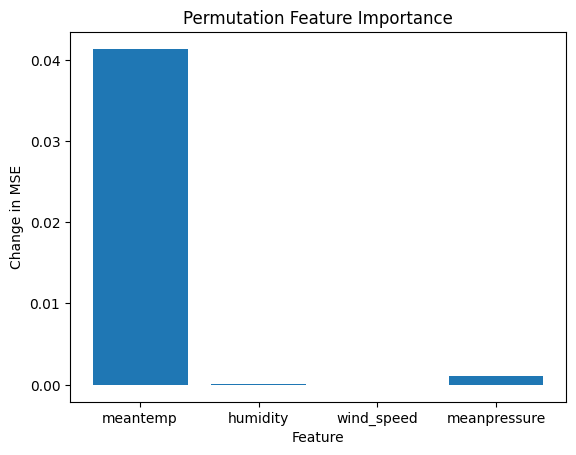

In [46]:
# Sensitivity analysis
# Baseline performance
baseline_mse = mean_squared_error(y_test, rnn_model.predict(X_test))

# Permutation importance
feature_importance = {}
for i, feature in enumerate(['meantemp', 'humidity', 'wind_speed', 'meanpressure']):
    X_test_permuted = X_test.copy()
    np.random.shuffle(X_test_permuted[:, :, i])  # Permute the feature
    permuted_mse = mean_squared_error(y_test, rnn_model.predict(X_test_permuted))
    feature_importance[feature] = permuted_mse - baseline_mse

print("Feature Importance (Permutation):")
for feature, importance in feature_importance.items():
    print(f"{feature}: {importance}")
plt.bar(feature_importance.keys(), feature_importance.values())
plt.xlabel('Feature')
plt.ylabel('Change in MSE')
plt.title('Permutation Feature Importance')
plt.show()


LSTM

In [47]:
num_hidden_units = 128
epochs = 30
batch_size = 3
patiance = 10

# Build the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(num_hidden_units, activation='tanh', input_shape=(sequence_length, X_train.shape[2])))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=patiance, restore_best_weights=True)

# Train the model
history = lstm_model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), batch_size=batch_size, callbacks=[early_stopping])

# Evaluate the model
loss = lstm_model.evaluate(X_test, y_test)
print(f'Validation Loss: {loss}')

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


388/388 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.0219 - val_loss: 0.0039
Epoch 2/30
388/388 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - loss: 0.0043 - val_loss: 0.0038
Epoch 3/30
388/388 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0040 - val_loss: 0.0033
Epoch 4/30
388/388 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0041 - val_loss: 0.0029
Epoch 5/30
388/388 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0030 - val_loss: 0.0032
Epoch 6/30
388/388 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0034 - val_loss: 0.0026
Epoch 7/30
388/388 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0029 - val_loss: 0.0037
Epoch 8/30
388/388 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0031 - val_loss: 0.0027
Epoch 9/30
388/388 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0028 - val_loss: 0.0024
Epoch 10/30
388/388 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0031 - val_loss: 0.0027
Epoch 11/30
388/388 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0031 - val_loss: 0.0031
Epoch 12/30
388/388 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 

In [48]:
lstm_model.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 128)                 │          68,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 204,677 (799.52 KB)

 Trainable params: 68,225 (266.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 136,452 (533.02 KB)

In [49]:
# Make predictions
lstm_pred = lstm_model.predict(X_test)
#lstm_pred = target_transformer.inverse_transform(lstm_pred)  # Inverse transform to original scale

# Inverse transform the true values for comparison
y_test = y_test.reshape(-1, 1)
#y_test = target_transformer.inverse_transform(y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


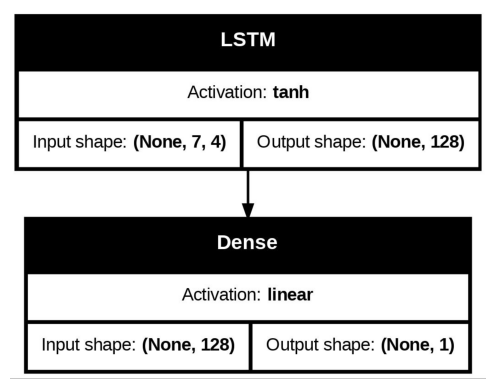

In [50]:
LSTM_img_file = '/tmp/model_2.jpg'

plot_model(
    lstm_model,
    to_file=LSTM_img_file,
    show_shapes=True,
    show_layer_activations=True,
)

LSTM_img = plt.imread(LSTM_img_file)
plt.axis('off')
plt.imshow(LSTM_img)
plt.show()

RMSE: 0.04917739567401014
R2 Score: 0.9203034944746518


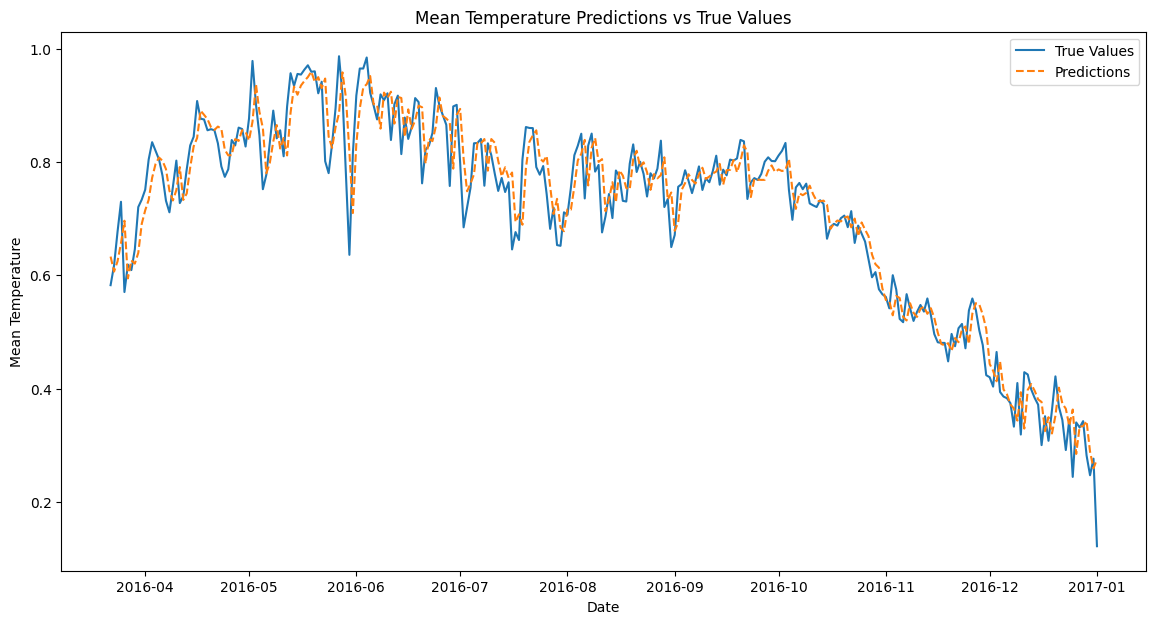

In [51]:
# Calculate RMSE and R2 scores
rmse = np.sqrt(mean_squared_error(y_test, lstm_pred))
r2 = r2_score(y_test, lstm_pred)

print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(df.index[-len(y_test):], y_test, label='True Values')
plt.plot(df.index[-len(y_test):], lstm_pred, label='Predictions', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('Mean Temperature Predictions vs True Values')
plt.legend()
plt.show()

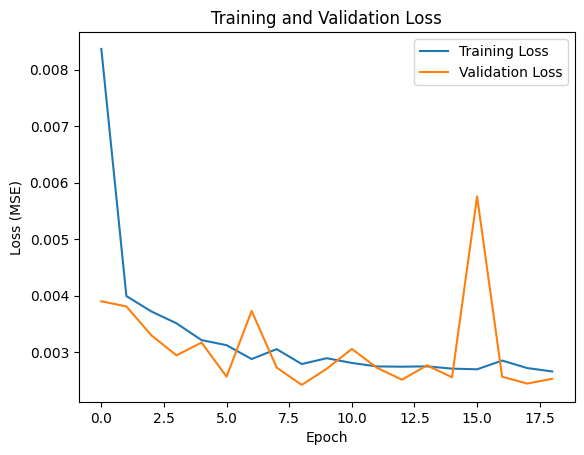

In [52]:
# Get training and validation losses from history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plot loss values over epochs
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [54]:
import itertools
# Hyperparameter analysis
num_units_range = [64, 128, 256]
batch_size_range = [1, 3, 5]
hyperparameter_results = []

# Iterate over different hyperparameters
for num_units, batch_size in itertools.product(num_units_range, batch_size_range):
    print(f"Testing num_units={num_units}, batch_size={batch_size}")

    model = Sequential()
    model.add(LSTM(num_units, activation='tanh', input_shape=(sequence_length, X_train.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    history = model.fit(X_train, y_train, epochs=30, callbacks=[early_stopping], batch_size=batch_size, verbose=0)

    loss = model.evaluate(X_test, y_test, verbose=0)

    lstm_pred = model.predict(X_test,verbose=0)
    rmse = np.sqrt(mean_squared_error(y_test, lstm_pred))

    r2 = r2_score(y_test, lstm_pred)
    hyperparameter_results.append((num_units, batch_size, loss, rmse,r2))

# Display results
for result in hyperparameter_results:
    print(f"num_units={result[0]}, batch_size={result[1]} -> Loss: {result[2]}, RMSE {result[3]}, R2 {result[4]}")

Testing num_units=64, batch_size=1
Testing num_units=64, batch_size=3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


Testing num_units=64, batch_size=5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


Testing num_units=128, batch_size=1


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


Testing num_units=128, batch_size=3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


Testing num_units=128, batch_size=5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


Testing num_units=256, batch_size=1


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


Testing num_units=256, batch_size=3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


Testing num_units=256, batch_size=5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


num_units=64, batch_size=1 -> Loss: 0.002503374358639121, RMSE 0.050033734045314866, R20.9175037781650364
num_units=64, batch_size=3 -> Loss: 0.0024513450916856527, RMSE 0.049511062283239725, R20.9192183505613938
num_units=64, batch_size=5 -> Loss: 0.0024115953128784895, RMSE 0.0491079972281116, R20.9205282689283711
num_units=128, batch_size=1 -> Loss: 0.0024084649048745632, RMSE 0.04907611404637661, R20.9206314288719121
num_units=128, batch_size=3 -> Loss: 0.0027308803983032703, RMSE 0.05225782525031542, R20.9100065518769224
num_units=128, batch_size=5 -> Loss: 0.002592208795249462, RMSE 0.050913739794019745, R20.9145763301457418
num_units=256, batch_size=1 -> Loss: 0.002520316280424595, RMSE 0.05020275248568262, R20.9169454774898648
num_units=256, batch_size=3 -> Loss: 0.0024508938658982515, RMSE 0.049506504479257314, R20.9192332227923491
num_units=256, batch_size=5 -> Loss: 0.002474695909768343, RMSE 0.04974631397056657, R20.9184488591696952


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Feature Importance (Permutation):
meantemp: 0.041792250466406854
humidity: 0.000215352764343665
wind_speed: 1.9724423133188253e-05
meanpressure: 0.001377382218210922


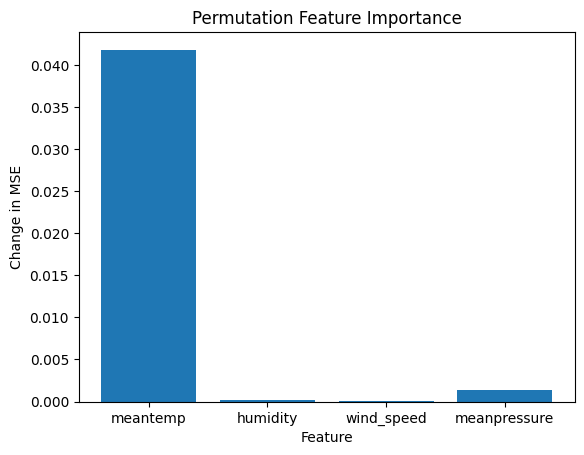

In [55]:
# Sensitivity analysis
# Baseline performance
baseline_mse = mean_squared_error(y_test, lstm_model.predict(X_test))

# Permutation importance
feature_importance = {}
for i, feature in enumerate(['meantemp', 'humidity', 'wind_speed', 'meanpressure']):
    X_test_permuted = X_test.copy()
    np.random.shuffle(X_test_permuted[:, :, i])  # Permute the feature
    permuted_mse = mean_squared_error(y_test, lstm_model.predict(X_test_permuted))
    feature_importance[feature] = permuted_mse - baseline_mse

print("Feature Importance (Permutation):")
for feature, importance in feature_importance.items():
    print(f"{feature}: {importance}")
plt.bar(feature_importance.keys(), feature_importance.values())
plt.xlabel('Feature')
plt.ylabel('Change in MSE')
plt.title('Permutation Feature Importance')
plt.show()


TNN (plan)

In [56]:
# Transformer model building code from example: https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_10_5_keras_transformers.ipynb

from tensorflow import keras
from tensorflow.keras import layers


def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    # Match feature dimensions explicitly
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res


# function to build transformer nn
def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(1)(x)
    return keras.Model(inputs, outputs)


In [57]:
print(X_train.shape[1:])

(7, 4)


In [58]:
input_shape = (X_train.shape[1], X_train.shape[2])  # (4, 4)

modelTransformer = build_model(
    input_shape,
    #head_size=256,
    head_size=64,
    num_heads=4,
    ff_dim=64,
    #num_transformer_blocks=4,
    num_transformer_blocks=6,
    mlp_units=[64],
    #mlp_units=[128],
    dropout=0,
    mlp_dropout=0,
)

modelTransformer.compile(
    loss="mean_squared_error",
    optimizer=keras.optimizers.Adam(learning_rate=1e-2)
)
# Tested leranign rate  1e-3 1e-4 and 1e-5
modelTransformer.summary()

Model: "functional_75"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_37            │ (None, 7, 4)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization       │ (None, 7, 4)           │              8 │ input_layer_37[0][0]   │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention      │ (None, 7, 4)           │          4,868 │ layer_normalization[0… │
│ (MultiHeadAttention)      │                        │                │ layer_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 7, 4)           │              0 │ multi_head_attention[… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 7, 4)           │              0 │ dropout_1[0][0],       │
│                           │                        │                │ input_layer_37[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_1     │ (None, 7, 4)           │              8 │ add[0][0]              │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d (Conv1D)           │ (None, 7, 64)          │            320 │ layer_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 7, 64)          │              0 │ conv1d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_1 (Conv1D)         │ (None, 7, 4)           │            260 │ dropout_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 7, 4)           │              0 │ conv1d_1[0][0],        │
│                           │                        │                │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_2     │ (None, 7, 4)           │              8 │ add_1[0][0]            │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_1    │ (None, 7, 4)           │          4,868 │ layer_normalization_2… │
│ (MultiHeadAttention)      │                        │                │ layer_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_4 (Dropout)       │ (None, 7, 4)           │              0 │ multi_head_attention_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_2 (Add)               │ (None, 7, 4)           │              0 │ dropout_4[0][0],       │
│                           │                        │                │ add_1[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_3     │ (None, 7, 4)           │              8 │ add_2[0][0]            │
│ (LayerNormalization) 

 Total params: 33,361 (130.32 KB)

 Trainable params: 33,361 (130.32 KB)

 Non-trainable params: 0 (0.00 B)

sequence length = 4
- dropout = 0.1
Score (RMSE): 0.06275645779984174
R2 Score: 0.8691105215746717
train time 1min


sequence length = 4
- drop out 0
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 362ms/step
RMSE: 0.06251693865176437
R2 Score: 0.8701077323963469
train time 45s



with sequence lenght 7:
- with learning rate  1e-3
- dropout 0
RMSE: 0.0568338819045151
R2 Score: 0.8935555876364407


with sequence lenght 7:
- dropout 0.1
RMSE: 0.06692122496300261
R2 Score: 0.852417116447851
train time 1min



with sequence length 31:
- drop out 0
RMSE: 0.07452794653307342
R2 Score: 0.8293432661221862
train time 4min


**with sequence lenght 7 and dropout 0**

learning rate:
- 1e-2 :
RMSE: 0.07685036373591297
R2 Score: 0.80537434711141
train time 45sek

learning rate:
- 1e-3 :
RMSE: 0.0568338819045151
R2 Score: 0.8935555876364407
train time 1min

learning rate:
- 1e-4:
RMSE: 0.061317551332929744
R2 Score: 0.8760981376142318
train time 2min

learning rate:
- 1e-5
RMSE: 0.11784003295415955
R2 Score: 0.5423916522842287
train time 2min


In [59]:
callbacks = [
    keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
]

history_transformer = modelTransformer.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=150,
    batch_size=32,
    callbacks=callbacks,
)

modelTransformer.evaluate(X_test, y_test, verbose=1)

Epoch 1/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 67ms/step - loss: 0.3764 - val_loss: 0.0104
Epoch 2/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0153 - val_loss: 0.0052
Epoch 3/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0076 - val_loss: 0.0041
Epoch 4/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0059 - val_loss: 0.0051
Epoch 5/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0079 - val_loss: 0.0037
Epoch 6/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0049 - val_loss: 0.0040
Epoch 7/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 0.0053 - val_loss: 0.0047
Epoch 8/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0073 - val_loss: 0.0034
Epoch 9/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0054 - val_loss: 0.0059
Epoch 10/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0062 - val_loss: 0.0040
Epoch 11/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0052 - val_loss: 0.0041
Epoch 12/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/ste

ValueError: Cannot take the length of shape with unknown rank.

In [ ]:
training_loss = history_transformer.history['loss']
validation_loss = history_transformer.history['val_loss']


plt.figure(figsize=(10, 6))
plt.plot(training_loss, label='Training Loss', color='blue')
plt.plot(validation_loss, label='Validation Loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Transformer training and validation Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Evaluation metrics
from sklearn import metrics

transformer_pred = modelTransformer.predict(X_test)
score = np.sqrt(metrics.mean_squared_error(transformer_pred,y_test))
print("RMSE: {}".format(score))

r2 = metrics.r2_score(y_test, transformer_pred)
print(f"R2 Score: {r2}")

In [ ]:
import matplotlib.pyplot as plt

if transformer_pred.ndim > 1 and transformer_pred.shape[1] == 1:
    transformer_pred = transformer_pred.flatten()

plt.figure(figsize=(14, 7))
plt.plot(df.index[-len(y_test):], y_test, label='True Values')
plt.plot(df.index[-len(y_test):], transformer_pred, label='Predictions', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Mean temperature')
plt.title('Transformer mean temperature predictions vs true values')
plt.legend()
plt.show()


In [ ]:
TNN_img_file = '/tmp/model_3.jpg'

plot_model(
    modelTransformer,
    to_file=TNN_img_file,
    show_shapes=True,
    show_layer_activations=True,
)

plt.figure(figsize=(16, 16))
TNN_img = plt.imread(TNN_img_file)
plt.axis('off')
plt.imshow(TNN_img)
plt.show()